In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import shuffle
from sklearn.metrics import log_loss

In [ ]:
https://drive.google.com/file/d/1FS-JXMl-PFGzA2ogy1xdBKVI6VbVDQMF/view?usp=sharing

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1FS-JXMl-PFGzA2ogy1xdBKVI6VbVDQMF

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1FS-JXMl-PFGzA2ogy1xdBKVI6VbVDQMF
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 43.0MB/s]


In [3]:
df = pd.read_csv('/content/heart_disease_health_indicators.csv')

In [4]:
df = df.rename(columns={'Income': 'HeartDiseaseorAttack', 'HeartDiseaseorAttack': 'Income'})

In [5]:
df['Income'], df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].copy(), df['Income'].copy()

In [6]:
# جدا کردن ویژگی‌ها و خروجی
features = df.iloc[:, :-1]  # ستونهای ۲ تا آخر به عنوان ویژگی‌ها
output = df.iloc[:, -1]    # ستون اول به عنوان خروجی

# ایجاد دیتافریم جدید برای هر کلاس
class_0_samples = df[output == 0].head(100)
class_1_samples = df[output == 1].head(100)

# ادغام داده‌های دو کلاس در یک دیتافریم جدید
new_df = pd.concat([class_0_samples, class_1_samples], ignore_index=True)

In [7]:
shuffled_data = shuffle(new_df)
shuffled_data.to_csv('created_data.csv', index=False)

In [8]:
df1 = pd.read_csv('/content/created_data.csv')
df1

,Income,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,HeartDiseaseorAttack
0,4,1,0,1,27,0,0,2,1,1,...,1,0,1,0,0,0,0,13,5,0
1,8,1,0,1,39,0,0,0,0,1,...,1,0,3,1,1,0,1,8,4,0
2,5,1,1,1,32,1,0,2,1,0,...,1,0,3,0,0,0,1,7,4,0
3,3,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,0
4,6,1,1,1,28,0,0,2,0,0,...,1,0,4,0,0,1,0,11,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,6,1,0,1,33,1,0,0,1,0,...,1,0,2,0,3,0,1,11,4,1
196,7,0,0,1,26,1,0,0,0,0,...,1,0,3,0,15,0,0,7,5,0
197,3,1,1,1,30,1,0,0,1,1,...,1,0,2,5,3,0,0,11,5,1
198,3,0,0,1,28,1,1,0,0,1,...,1,1,4,15,30,1,0,7,4,0


In [9]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1].values.reshape(-1,1)
X.shape,y.shape

((200, 21), (200, 1))

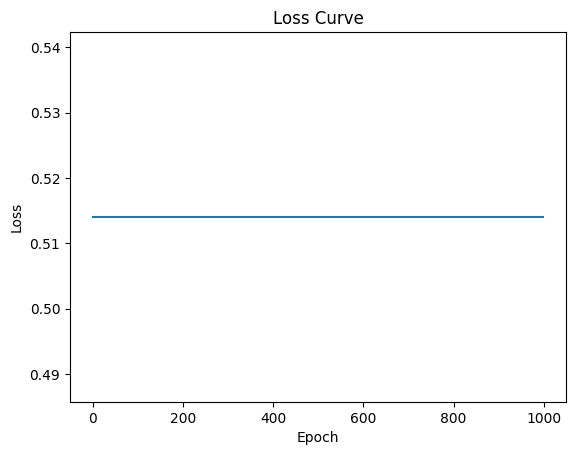

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
# آموزش مدل و دریافت مقدار تابع اتلاف در هر تکرار
loss_history = [];

for epoch in range(1000):
    # آموزش مدل
    model.fit(x_train, y_train)

    # پیش‌بینی احتمالات
    y_prob = model.predict_proba(x_train);

    # محاسبه تابع اتلاف
    loss = -np.sum(np.log(y_prob[np.arange(len(y_prob)), y_train])) / len(y_train);

    loss_history.append(loss);


# نمایش نمودار تغییرات تابع اتلاف در هر تکرار
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [11]:
y_pred=model.predict(x_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# محاسبه recall برای کلاس 0
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
print(f"Recall for Class 0: {recall_class_0}")

# محاسبه precision برای کلاس 0
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
print(f"Precision for Class 0: {precision_class_0}")

# محاسبه recall برای کلاس 1
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
print(f"Recall for Class 1: {recall_class_1}")

# محاسبه precision برای کلاس 1
precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision for Class 1: {precision_class_1}")

Confusion Matrix:
[[13  7]
 [ 3 17]]
Recall for Class 0: 0.65
Precision for Class 0: 0.8125
Recall for Class 1: 0.85
Precision for Class 1: 0.7083333333333334


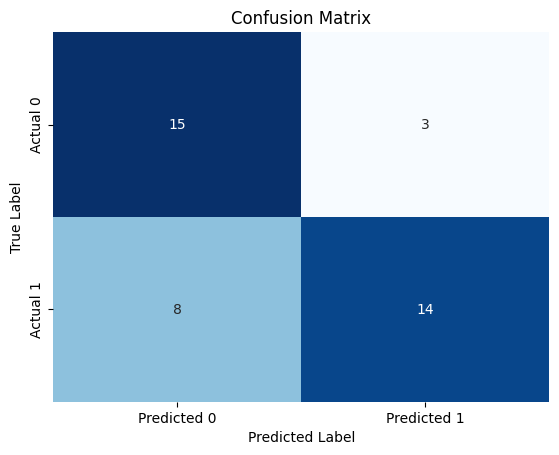

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)

# رسم ماتریس درهم‌ریختگی با استفاده از سی‌بورن
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
model.score(x_train,y_train)

0.75625

In [13]:
model.score(x_test,y_test)

0.75